/tmp/ipykernel_704/4205541698.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


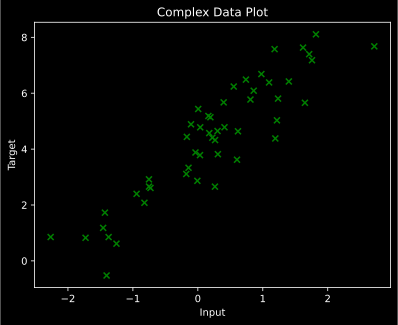

In [15]:
# Import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


plt.style.use('dark_background')
# Create new complex data
N = 50
x_complex = torch.randn(N, 1)
y_complex = 2 * x_complex + 4 + torch.randn(N, 1)

# Plot the new data
plt.scatter(x_complex, y_complex, marker='x', color='green')
plt.xlabel('Input')
plt.ylabel('Target')
plt.title('Complex Data Plot')
plt.show()


In [37]:
# Build a new neural network model
complex_model = nn.Sequential(
    nn.Linear(1, 1),   # Input layer
    nn.Sigmoid(),         # Activation function
    nn.Linear(1, 1)    # Output layer
)

# In PyTorch, bias terms are actually included by default in nn.Linear layers unless you explicitly disable them.
# If you wanted to explicitly see or control these bias terms in your PyTorch model, you could access them like this

# Access bias of the first linear layer
first_layer_bias = complex_model[0].bias

# Access bias of the second linear layer
second_layer_bias = complex_model[2].bias

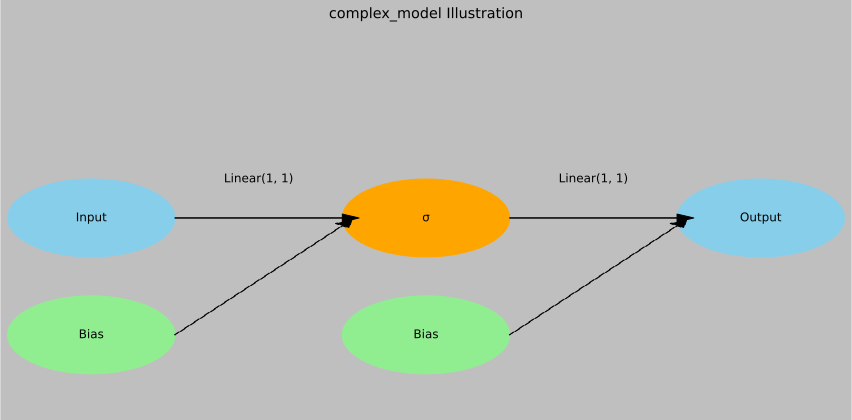

In [48]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.style.use('classic')

# Node positions
input_pos = (0.1, 0.5)
hidden_pos = (0.5, 0.5)
output_pos = (0.9, 0.5)
bias1_pos = (0.1, 0.2)
bias2_pos = (0.5, 0.2)

# Draw nodes
ax.add_patch(plt.Circle(input_pos, 0.1, fill=True, color='skyblue'))
ax.add_patch(plt.Circle(hidden_pos, 0.1, fill=True, color='orange'))
ax.add_patch(plt.Circle(output_pos, 0.1, fill=True, color='skyblue'))
ax.add_patch(plt.Circle(bias1_pos, 0.1, fill=True, color='lightgreen'))
ax.add_patch(plt.Circle(bias2_pos, 0.1, fill=True, color='lightgreen'))

# Draw connections
ax.arrow(0.2, 0.5, 0.2, 0, head_width=0.02, head_length=0.02, fc='k', ec='k')
ax.arrow(0.6, 0.5, 0.2, 0, head_width=0.02, head_length=0.02, fc='k', ec='k')
ax.arrow(0.2, 0.2, 0.2, 0.28, head_width=0.02, head_length=0.02, fc='k', ec='k', linestyle='--')
ax.arrow(0.6, 0.2, 0.2, 0.28, head_width=0.02, head_length=0.02, fc='k', ec='k', linestyle='--')

# Add labels
ax.text(0.1, 0.5, 'Input', ha='center', va='center')
ax.text(0.5, 0.5, 'σ', ha='center', va='center')
ax.text(0.9, 0.5, 'Output', ha='center', va='center')
ax.text(0.1, 0.2, 'Bias', ha='center', va='center')
ax.text(0.5, 0.2, 'Bias', ha='center', va='center')
ax.text(0.3, 0.6, 'Linear(1, 1)', ha='center', va='center')
ax.text(0.7, 0.6, 'Linear(1, 1)', ha='center', va='center')

# Set limits and remove axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

plt.title('complex_model Illustration')
plt.tight_layout()
plt.show()

plt.style.use('dark_background')

In [38]:
complex_model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [39]:
first_layer_bias

Parameter containing:
tensor([-0.2858], requires_grad=True)

In [40]:
second_layer_bias

Parameter containing:
tensor([0.2561], requires_grad=True)

In [41]:
# Set a new learning rate
learningRate_complex = 0.1

# Define a new loss function
lossfun_complex = nn.MSELoss()

# Create a new optimizer
optimizer_complex = torch.optim.SGD(complex_model.parameters(), lr=learningRate_complex)


In [42]:
# Train the complex model
numepochs_complex = 2000
losses_complex = []

for epoch_complex in range(numepochs_complex):
    # Forward pass
    yHat_complex = complex_model(x_complex)
    
    # Compute loss
    loss_complex = lossfun_complex(yHat_complex, y_complex)
    losses_complex.append(loss_complex.item())
    
    # Backpropagation
    optimizer_complex.zero_grad()
    loss_complex.backward()
    optimizer_complex.step()


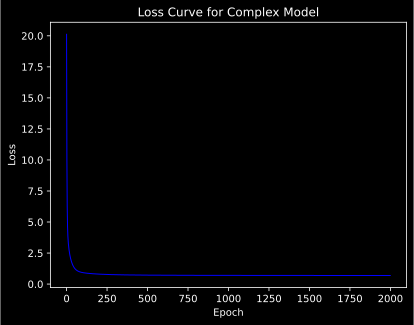

In [43]:
# Show the loss curve
plt.plot(losses_complex, 'b-', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve for Complex Model')
plt.show()


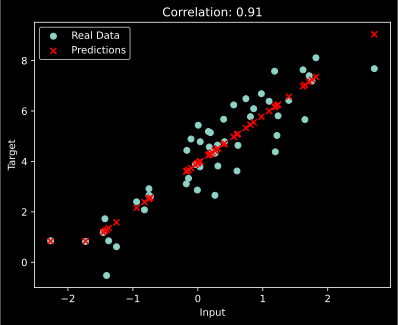

In [23]:
# Plot the new data and predictions
predictions_complex = complex_model(x_complex)

plt.scatter(x_complex, y_complex, marker='o', label='Real Data')
plt.scatter(x_complex, predictions_complex.detach(), marker='x', color='red', label='Predictions')
plt.xlabel('Input')
plt.ylabel('Target')
plt.title(f'Correlation: {np.corrcoef(y_complex.T, predictions_complex.detach().T)[0, 1]:.2f}')
plt.legend()
plt.show()
